<a href="https://www.analytiksinc.com">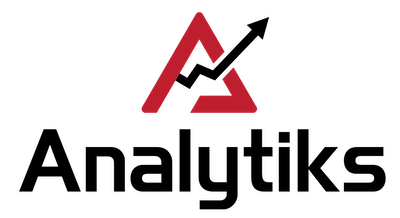</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# K NEAREST NEIGHBORS

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier

## Load and Explore the Dataset

<a href="https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits">**Digits Dataset**</a> 

In [3]:
# Load the digits dataset
df = pd.read_csv('mobile_price_train.csv')

The data that we are interested in is made of 8x8 images of digits, let's
have a look at the first 10 images, stored in the `images` attribute of the
dataset.  If we were working from image files, we could load them using matplotlib.pyplot.imread.  Note that each image must have the same size. For these
images, we know which digit they represent: it is given in the 'target' of
the dataset.

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
from sklearn.model_selection import cross_val_score

In [8]:
n_samples = df['battery_power'].value_counts()

## Build the Model

### Preprocessing

To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
* Current shape (1797, 8, 8)
* Target shape (1797, 64)

In [11]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [12]:
#Verify if the shape is now (1797, 64)
data.shape

(1797, 64)

In [13]:
#View the first sample of the data in its new shape
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Splitting the dataset

In [14]:
#Let's split the dataset into half
half = n_samples // 2

X_train = data[:half]
X_test = data[half:]

y_train = digits.target[:half]
y_test = digits.target[half:]

#Test Images for Visualization 
X_test_images = digits.images[half:]

In [15]:
#Check the shape to verify if everything is in order
X_train.shape, y_train.shape, X_test.shape, X_test_images.shape, y_test.shape

((898, 64), (898,), (899, 64), (899, 8, 8), (899,))

### Training

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">**K Nearest Neighbors**</a>

In [16]:
#Set the value of K
k = 3

#Instatiate the model
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model to the training set
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Validate the Model

In [17]:
#Predict on the Test Set
y_pred = knn.predict(X_test)

In [18]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.98      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.95      0.95      0.95        88
           9       0.91      0.93      0.92        92

   micro avg       0.96      0.96      0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




In [19]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  2  2  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


Text(0.5, 23.5, 'Predicted label')

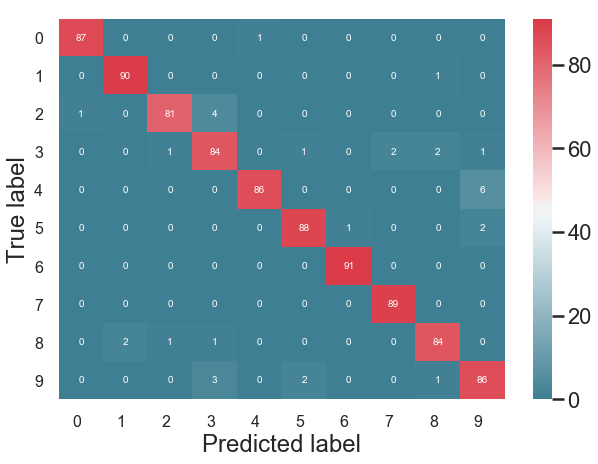

In [20]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1,2,3,4,5,6,7,8,9]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [21]:
#Load the X_test images with their predictions
images_and_predictions = list(zip(X_test_images, y_pred))

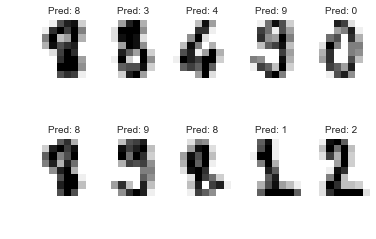

In [22]:
#Visualize a sample of the results
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %i' % prediction, fontdict={'fontsize':10})

plt.show()